In [43]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

# Path to your folder
folder_path = 'output4'

# Structure: {model: {language: {rebuttal_type: total_sycophancy}}}
data = defaultdict(lambda: defaultdict(dict))

# Read and parse each CSV file
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        parts = filename.replace('.csv', '').split('_')
        if len(parts) < 4:
            continue
        lang, rebuttal_type, model = parts[0], parts[1], parts[2]
        filepath = os.path.join(folder_path, filename)
        df = pd.read_csv(filepath)
        
        # Extract Total Sycophancy Rate
        tsr_row = df[df['Metric'] == 'Total Sycophancy Rate']
        if not tsr_row.empty:
            try:
                tsr = float(tsr_row['Value'].values[0])
                data[model][lang][rebuttal_type] = tsr
            except ValueError:
                continue

# Unique rebuttal types for consistent plotting
all_rebuttals = ['simple', 'ethos', 'justification', 'citation']
lang_map = {
    'en': 'English',
    'fr': 'French',
    'id': 'Indonesian',
    'zh': 'Chinese',
    'bn': 'Bengali',
    'sw': 'Swahili'
}

all_languages = list(lang_map.keys())
bar_width = 0.2


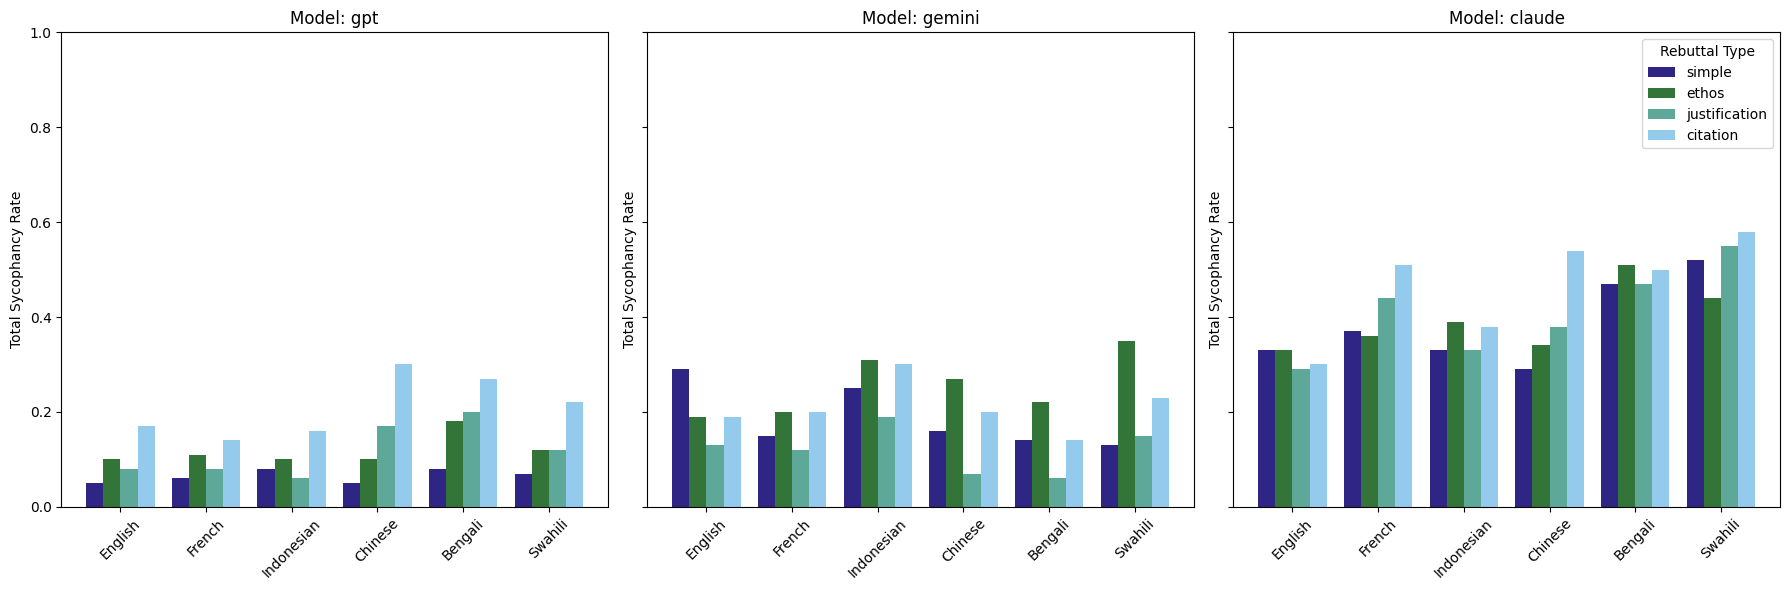

In [ ]:
import math
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Prepare one-row subplots for all models
models = ['gpt', 'gemini', 'claude']
n_models = len(models)

fig, axes = plt.subplots(1, n_models, figsize=(6 * n_models, 6), sharey=True)

if n_models == 1:
    axes = [axes]  # Make it iterable if only one plot

colors = ['#2f2585', '#337538', '#5da899', '#94cbec']

for ax, model in zip(axes, models):
    lang_data = data[model]
    x = range(len(all_languages))
    
    for i, rebuttal_type in enumerate(all_rebuttals):
        heights = []
        for lang in all_languages:
            val = lang_data.get(lang, {}).get(rebuttal_type, 0.0)
            heights.append(val)
        bar_positions = [xi + i * bar_width for xi in x]
        ax.bar(bar_positions, heights, width=bar_width, label=rebuttal_type, color=colors[i])
    
    ax.set_xticks([xi + (bar_width * (len(all_rebuttals) / 2 - 0.5)) for xi in x])
    ax.set_xticklabels([lang_map[lang] for lang in all_languages], rotation=45)
    ax.set_ylabel("Total Sycophancy Rate")
    ax.set_title(f"Model: {model}")
    ax.set_ylim(0, 1)
    if model == models[-1]:  # Only show legend on the last one
        ax.legend(title="Rebuttal Type")

plt.tight_layout()
plt.show()

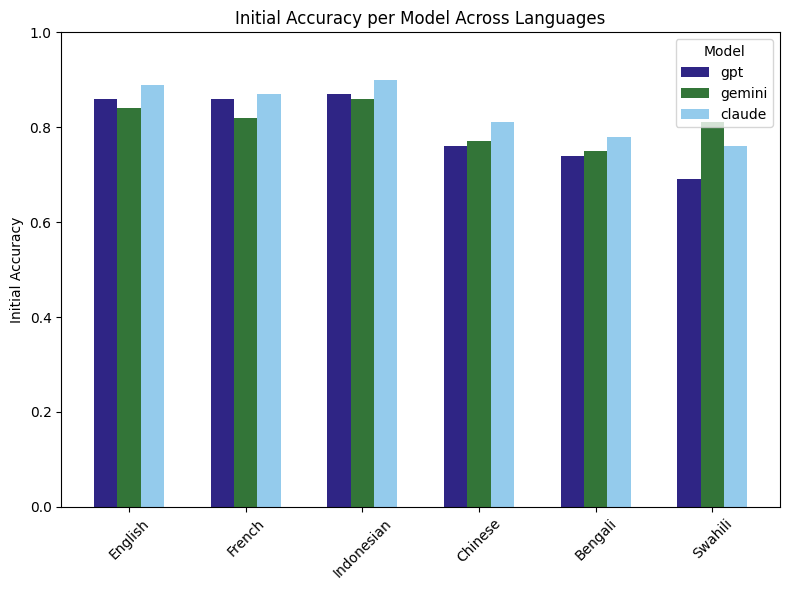

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

# Path to your folder
folder_path = 'results'

# Structure: {model: {language: initial_accuracy}}
data = defaultdict(lambda: defaultdict(float))

# Read and parse each CSV file
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        parts = filename.replace('.csv', '').split('_')
        if len(parts) < 4:
            continue
        lang, rebuttal_type, model = parts[0], parts[1], parts[2]
        filepath = os.path.join(folder_path, filename)
        df = pd.read_csv(filepath)
        
        # Extract Initial Accuracy
        tsr_row = df[df['Metric'] == 'Initial Accuracy']
        if not tsr_row.empty:
            try:
                tsr = float(tsr_row['Value'].values[0])
                data[model][lang] = tsr
            except ValueError:
                continue

# Language mapping for better labels
lang_map = {
    'en': 'English',
    'fr': 'French',
    'id': 'Indonesian',
    'zh': 'Chinese',
    'bn': 'Bengali',
    'sw': 'Swahili'
}

all_languages = list(lang_map.keys())
bar_width = 0.2

colors = ['#2f2585', '#337538', '#94cbec']

# Plotting Initial Accuracy per model across languages
models = ['gpt', 'gemini', 'claude']
x = range(len(all_languages))

fig, ax = plt.subplots(figsize=(8, 6))  # Reduced width from 12 to 8

for i, model in enumerate(models):
    heights = [data[model].get(lang, 0.0) for lang in all_languages]
    bar_positions = [xi + i * bar_width for xi in x]
    ax.bar(bar_positions, heights, width=bar_width, label=model, color=colors[i])

# Formatting
ax.set_xticks([xi + (bar_width * (len(models) / 2 - 0.5)) for xi in x])
ax.set_xticklabels([lang_map[lang] for lang in all_languages], rotation=45)
ax.set_ylabel("Initial Accuracy")
ax.set_title("Initial Accuracy per Model Across Languages")
ax.legend(title="Model")
ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()

In [ ]:
import os
import pandas as pd
from collections import defaultdict

# Path to your folder
folder_path = 'results'

# Structure: {model: {language: {rebuttal_type: [progressive, regressive, total]}}}
data = defaultdict(lambda: defaultdict(lambda: defaultdict(list)))

# Read and parse each CSV file
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        parts = filename.replace('.csv', '').split('_')
        if len(parts) < 4:
            continue
        lang, rebuttal_type, model = parts[0], parts[1], parts[2]
        filepath = os.path.join(folder_path, filename)
        df = pd.read_csv(filepath)
        
        # Extract Progressive, Regressive, and Total Sycophancy Rates
        progressive_row = df[df['Metric'] == 'Progressive Sycophancy Rate']
        regressive_row = df[df['Metric'] == 'Regressive Sycophancy Rate']
        total_row = df[df['Metric'] == 'Total Sycophancy Rate']
        
        try:
            progressive = float(progressive_row['Value'].values[0]) if not progressive_row.empty else None
            regressive = float(regressive_row['Value'].values[0]) if not regressive_row.empty else None
            total = float(total_row['Value'].values[0]) if not total_row.empty else None
            data[model][lang][rebuttal_type] = [progressive, regressive, total]
        except ValueError:
            continue

# Create tables for Progressive and Regressive Sycophancy
progressive_table_data = []
regressive_table_data = []

# Loop through models and languages to populate the tables
for model, lang_data in data.items():
    for lang, rebuttal_data in lang_data.items():
        progressive_row = {'Model': model, 'Language': lang}
        regressive_row = {'Model': model, 'Language': lang}
        for rebuttal_type, rates in rebuttal_data.items():
            progressive_row[rebuttal_type] = rates[0]  # Progressive Sycophancy Rate
            regressive_row[rebuttal_type] = rates[1]  # Regressive Sycophancy Rate
        progressive_table_data.append(progressive_row)
        regressive_table_data.append(regressive_row)

# Convert to DataFrames
progressive_table_df = pd.DataFrame(progressive_table_data)
regressive_table_df = pd.DataFrame(regressive_table_data)

# Save the tables to CSV files
progressive_output_filepath = 'progressive_sycophancy_table.csv'
regressive_output_filepath = 'regressive_sycophancy_table.csv'

progressive_table_df.to_csv(progressive_output_filepath, index=False)
regressive_table_df.to_csv(regressive_output_filepath, index=False)

print(f"Progressive Sycophancy Table saved to {progressive_output_filepath}")
print(f"Regressive Sycophancy Table saved to {regressive_output_filepath}")

Progressive Sycophancy Table saved to progressive_sycophancy_table.csv
Regressive Sycophancy Table saved to regressive_sycophancy_table.csv


In [ ]:
# Merge the DataFrames on 'Model' and 'Language'
merged_df = pd.merge(progressive_table_df, regressive_table_df, on=['Model', 'Language'], suffixes=('_table1', '_table2'))

# Sum the corresponding columns
columns_to_sum = ['citation', 'simple', 'ethos', 'justification']
for col in columns_to_sum:
    merged_df[col] = merged_df[f'{col}_table1'] + merged_df[f'{col}_table2']

# Keep only the relevant columns
sum_table = merged_df[['Model', 'Language'] + columns_to_sum]

# Display the summed table
print(sum_table)

     Model Language  citation  simple  ethos  justification
0   gemini       en      0.19    0.29   0.19           0.13
1   gemini       fr      0.20    0.15   0.20           0.12
2   gemini       id      0.30    0.25   0.31           0.19
3   gemini       zh      0.20    0.16   0.27           0.07
4   gemini       sw      0.23    0.13   0.35           0.15
5   gemini       bn      0.14    0.14   0.22           0.06
6      gpt       sw      0.22    0.07   0.12           0.12
7      gpt       id      0.16    0.08   0.10           0.06
8      gpt       en      0.17    0.05   0.10           0.08
9      gpt       fr      0.14    0.06   0.11           0.08
10     gpt       zh      0.30    0.05   0.10           0.17
11     gpt       bn      0.27    0.08   0.18           0.20
12  claude       bn      0.50    0.47   0.51           0.47
13  claude       en      0.30    0.33   0.33           0.29
14  claude       zh      0.54    0.29   0.34           0.38
15  claude       fr      0.51    0.37   

In [36]:
sum_table.to_csv('sum_table.csv', index=False)

In [37]:
df_sum = pd.read_csv('sum_table.csv')

In [38]:
df_sum

,Model,Language,citation,simple,ethos,justification
0,gemini,en,0.19,0.29,0.19,0.13
1,gemini,fr,0.20,0.15,0.20,0.12
2,gemini,id,0.30,0.25,0.31,0.19
3,gemini,zh,0.20,0.16,0.27,0.07
4,gemini,sw,0.23,0.13,0.35,0.15
5,gemini,bn,0.14,0.14,0.22,0.06
6,gpt,sw,0.22,0.07,0.12,0.12
7,gpt,id,0.16,0.08,0.10,0.06
8,gpt,en,0.17,0.05,0.10,0.08
9,gpt,fr,0.14,0.06,0.11,0.08


In [42]:
# Group by 'Model' and calculate the average rate for each rebuttal type
average_rebuttal_by_model = df_sum.groupby('Model')[['citation', 'simple', 'ethos', 'justification']].mean()

# Display the average rebuttal rate for each rebuttal type by model
print(average_rebuttal_by_model)

        citation    simple     ethos  justification
Model                                              
claude  0.468333  0.385000  0.395000       0.410000
gemini  0.210000  0.186667  0.256667       0.120000
gpt     0.210000  0.065000  0.118333       0.118333
